# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined = pd.merge(study_results, mouse_metadata, how='left')

# Display the data table for preview
combined.head(5)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
number_of_mice = len(combined["Mouse ID"].unique())
number_of_mice


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes = combined[combined.duplicated(['Mouse ID', 'Timepoint'])]
dupliace_id = dupes["Mouse ID"].unique()
dupliace_id


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates1 = combined[combined["Mouse ID"] == "g989"]
duplicates1

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined = combined[combined['Mouse ID']!='g989']
clean_combined.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
check = len(clean_combined["Mouse ID"].unique())
check

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
grouped_df = clean_combined.groupby("Drug Regimen")
mean_tv = grouped_df["Tumor Volume (mm3)"].mean()
median_tv = grouped_df["Tumor Volume (mm3)"].median()
std_tv = grouped_df["Tumor Volume (mm3)"].std()
var_tv = grouped_df["Tumor Volume (mm3)"].var()
sem_tv = grouped_df["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
summary_data = {"Mean Tumor Volume":mean_tv,"Median Tumor Volume":median_tv,"Variance Tumor Volume":var_tv,"Standard Deviation Tumor Volume":std_tv,"SEM Tumor Volume": sem_tv}
summary_df = pd.DataFrame(summary_data)
summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df2 = clean_combined.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(Mean="mean",Median="median",Variance="var",Standard_Dviation="std",SEM="sem")
summary_df2

,Mean,Median,Variance,Standard_Dviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

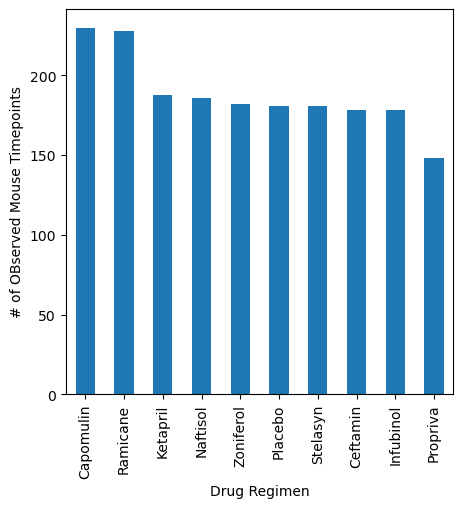

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
dr_count = clean_combined.groupby("Drug Regimen")["Timepoint"].count()
dr_count.columns = ["count"]

dr_count = dr_count.sort_values(ascending=False)
dr_count.plot(kind="bar", figsize=(5,5))
plt.xlabel("Drug Regimen")
plt.ylabel("# of OBserved Mouse Timepoints")
plt.show()


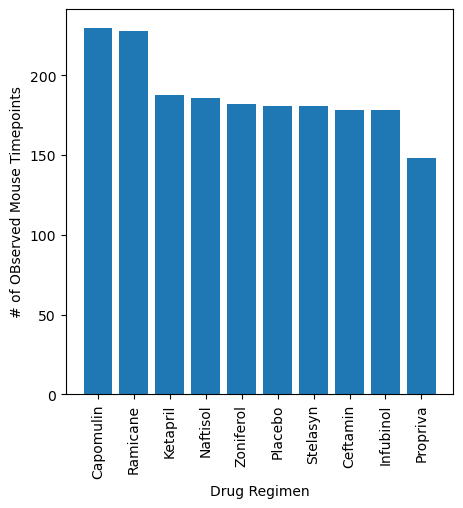

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(dr_count))
tick_loc = [value for value in x_axis]

plt.figure(figsize=(5,5))
plt.bar(x_axis, dr_count)
plt.xticks(tick_loc, dr_count.index, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of OBserved Mouse Timepoints")
plt.show()

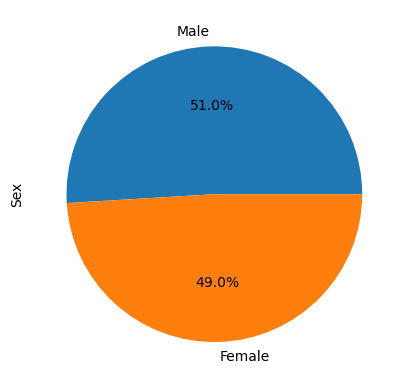

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gen_count = clean_combined["Sex"].value_counts()

gen_count.plot(kind="pie", autopct="%1.1f%%")
plt.show()


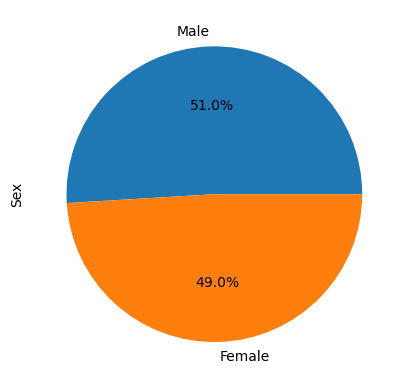

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gen_count, labels=["Male", "Female"],  autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timevalue = clean_combined.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumor_volume = pd.merge(clean_combined, last_timevalue, on=["Mouse ID", "Timepoint"])



In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = last_tumor_volume.loc[last_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    potential_outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{treatment} Potential Outliers: {potential_outliers}\n")


Capomulin Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol Potential Outliers: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



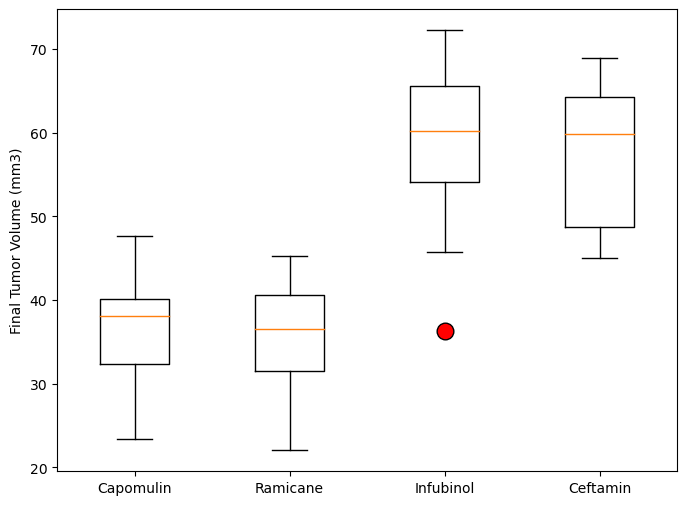

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.figure(figsize=(8,6))
flierprops = dict(marker='o', markerfacecolor='red', markersize=12)
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=flierprops)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

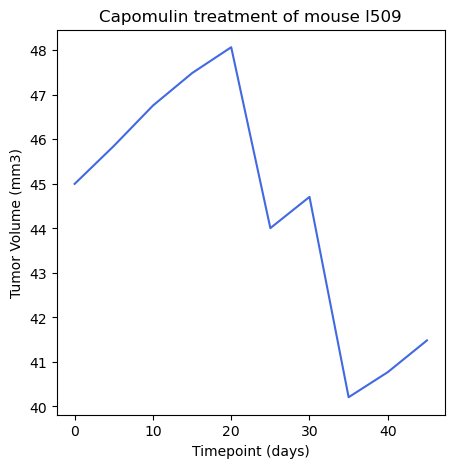

In [30]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_combined[clean_combined["Drug Regimen"] == "Capomulin"]
selected_mouse = "l509"

slected_mouse_data = capomulin_data[capomulin_data["Mouse ID"] == selected_mouse]
tumor_volumes = slected_mouse_data["Tumor Volume (mm3)"]
time = slected_mouse_data["Timepoint"]

plt.figure(figsize=(5,5))
plt.plot(time, tumor_volumes, color='royalblue')
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin treatment of mouse {selected_mouse}")
plt.show()


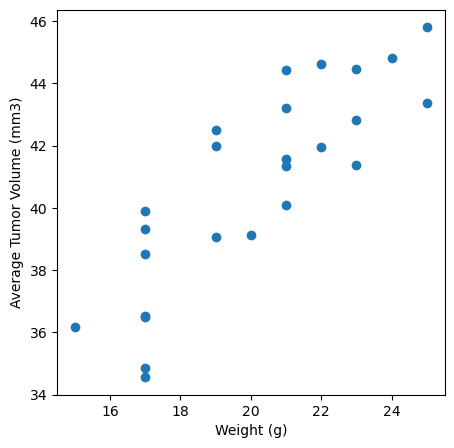

In [31]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

avg_tv = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].first()

plt.figure(figsize=(5,5))
plt.scatter(weight, avg_tv)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and the average tumor volume is 0.84


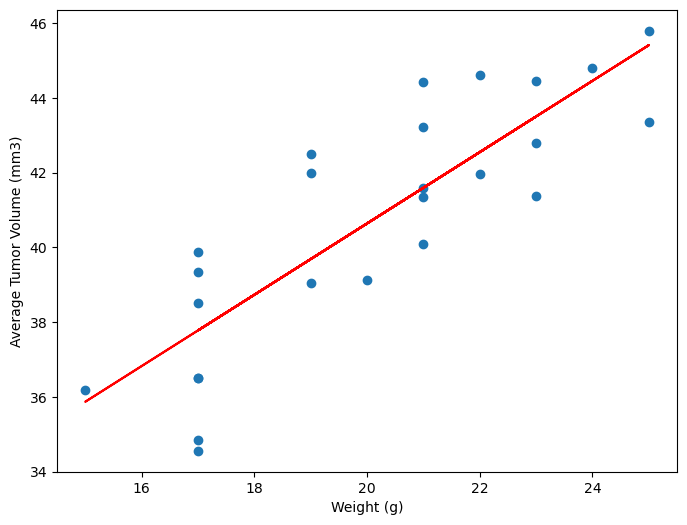

In [37]:
# Calculate the correlation coefficient and a linear regression model 
slope, intercept, r, p, std_err = st.linregress(weight, avg_tv)
fit = slope * weight + intercept

print(f"The correlation coefficient between mouse weight and the average tumor volume is {round(st.pearsonr(weight,avg_tv)[0],2)}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.figure(figsize=(8,6))
plt.scatter(weight, avg_tv)
plt.plot(weight, fit, color='r')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
